In [47]:
## IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# path of data
path = "2022/heart_2022_with_nans.csv"

In [10]:
dataframe = pd.read_csv(path)

In [11]:
dataframe.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [12]:
# describe-info dtype
dataframe.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [14]:
dataframe.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [15]:
dataframe.shape

(445132, 40)

In [22]:
# fill the missing values
for column in dataframe.columns:

  current_series = dataframe[column]

  if current_series.dtype == "object":
    max_concurrent = current_series.value_counts().idxmax()

    current_series.fillna(value=max_concurrent, inplace=True)

    print(column, " Filled with", max_concurrent)

  elif current_series.dtype in [int, float]:
    median = current_series.median()
    current_series.fillna(value=median, inplace=True)
    print(column, " Filled with", median)

State  Filled with Washington
Sex  Filled with Female
GeneralHealth  Filled with Very good
PhysicalHealthDays  Filled with 0.0
MentalHealthDays  Filled with 0.0
LastCheckupTime  Filled with Within past year (anytime less than 12 months ago)
PhysicalActivities  Filled with Yes
SleepHours  Filled with 7.0
RemovedTeeth  Filled with None of them
HadHeartAttack  Filled with No
HadAngina  Filled with No
HadStroke  Filled with No
HadAsthma  Filled with No
HadSkinCancer  Filled with No
HadCOPD  Filled with No
HadDepressiveDisorder  Filled with No
HadKidneyDisease  Filled with No
HadArthritis  Filled with No
HadDiabetes  Filled with No
DeafOrHardOfHearing  Filled with No
BlindOrVisionDifficulty  Filled with No
DifficultyConcentrating  Filled with No
DifficultyWalking  Filled with No
DifficultyDressingBathing  Filled with No
DifficultyErrands  Filled with No
SmokerStatus  Filled with Never smoked
ECigaretteUsage  Filled with Never used e-cigarettes in my entire life
ChestScan  Filled with No
Rac

In [23]:
# control missing values
dataframe.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [24]:
dataframe.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000
mean,4.241187,4.293378,7.022701,1.702517,82.853795,28.410347
std,8.607936,8.324664,1.493196,0.103673,20.420694,6.194472
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.490000,24.410000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,4.000000,8.000000,1.780000,91.630000,31.010000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [25]:
df = dataframe.copy()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


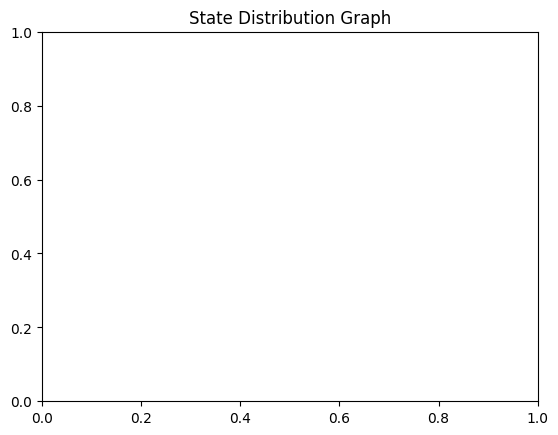

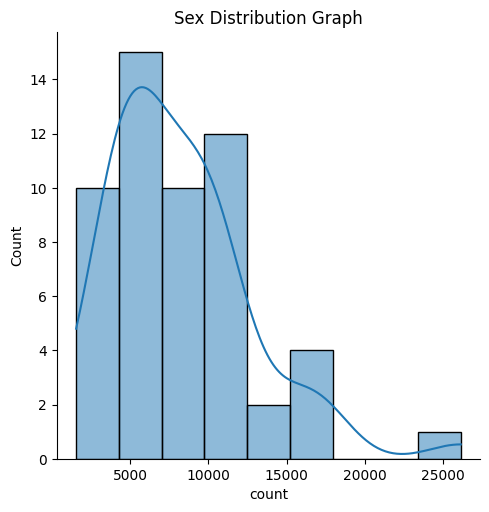

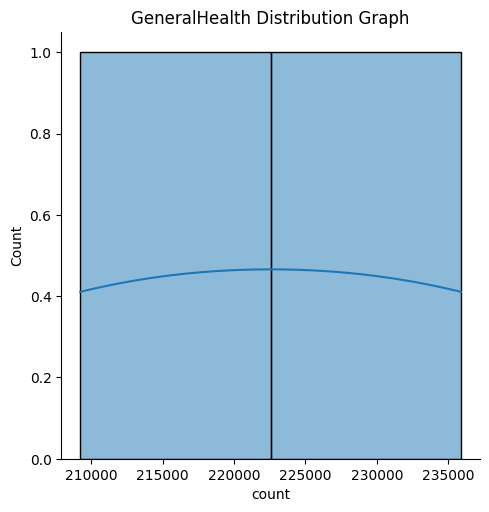

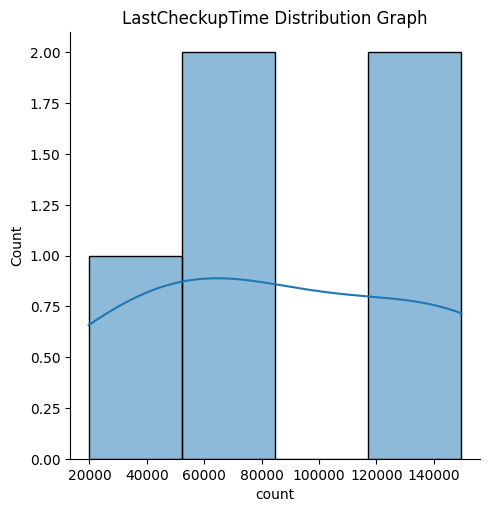

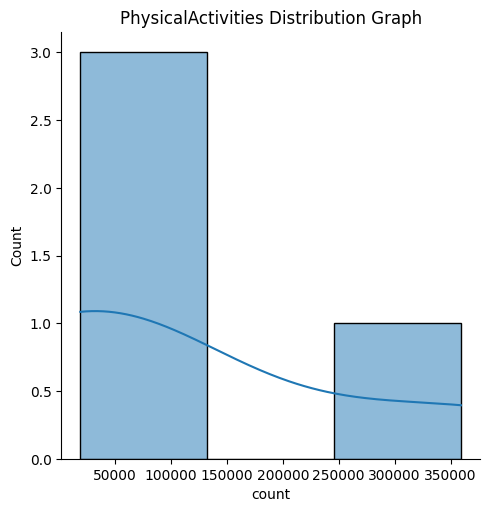

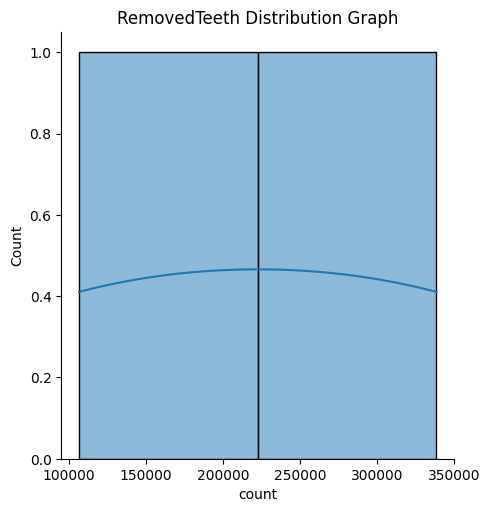

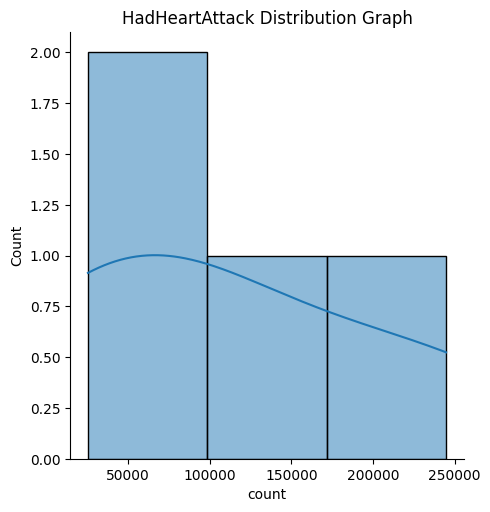

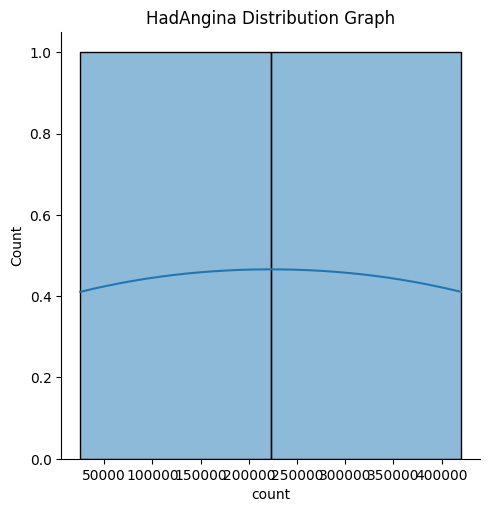

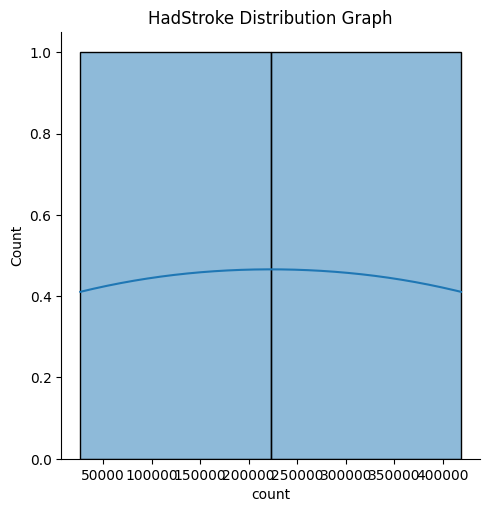

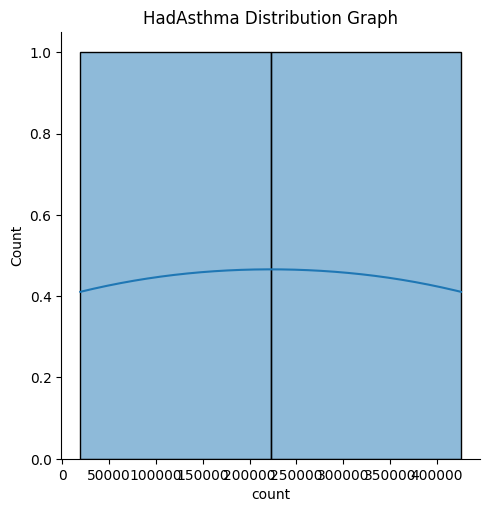

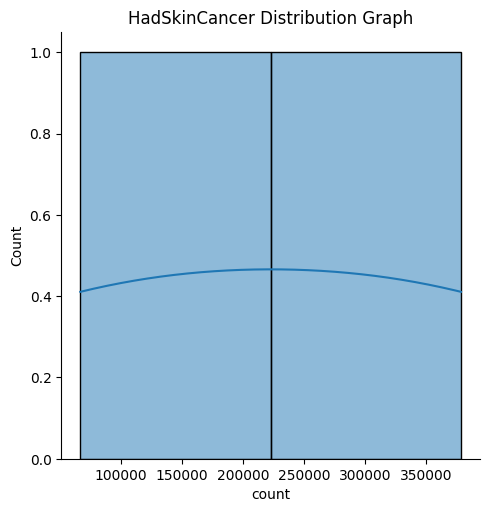

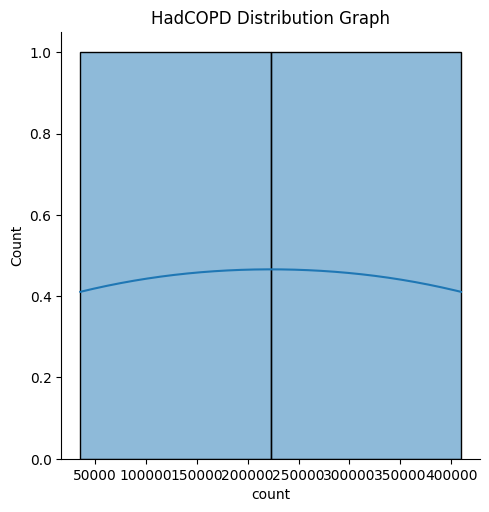

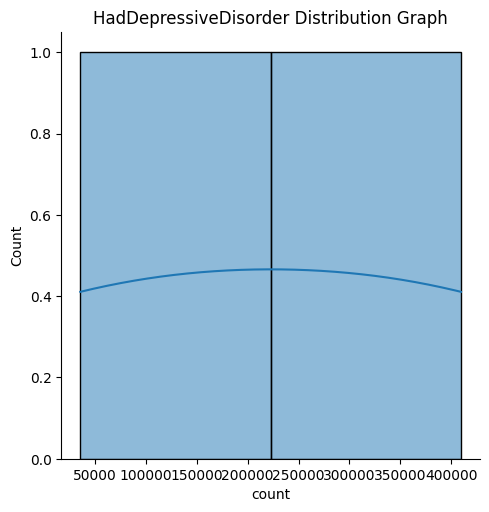

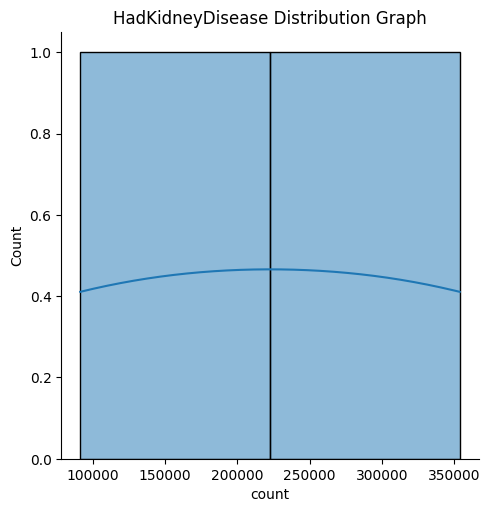

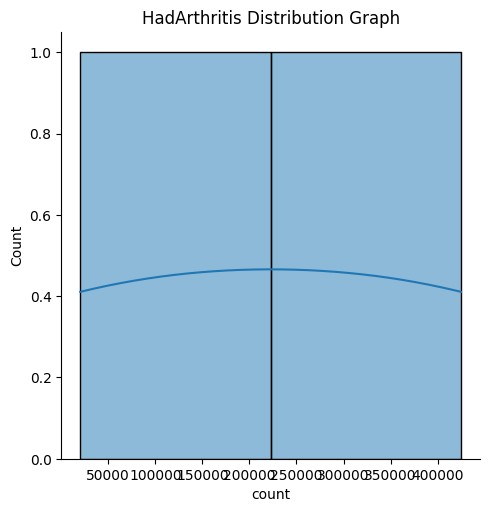

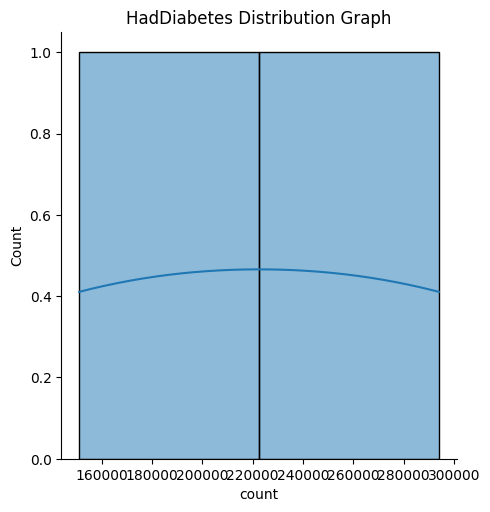

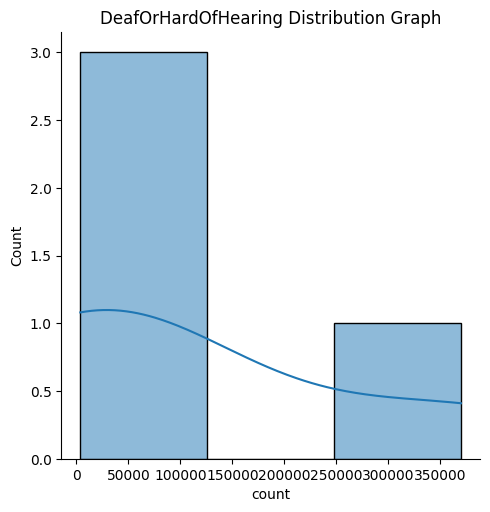

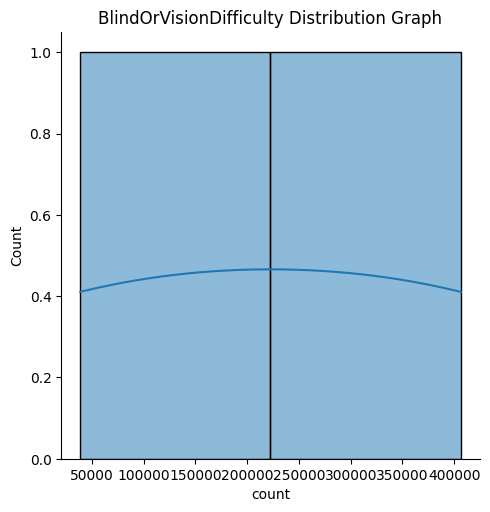

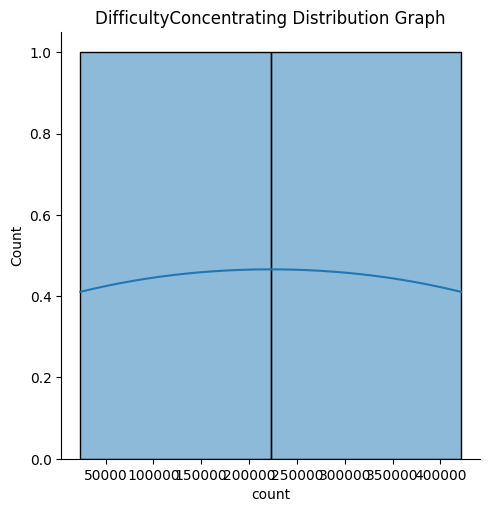

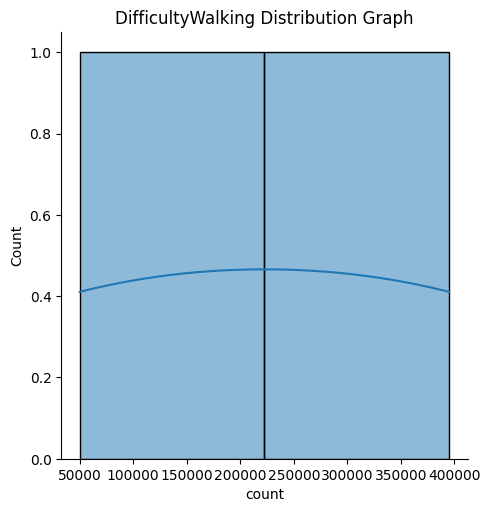

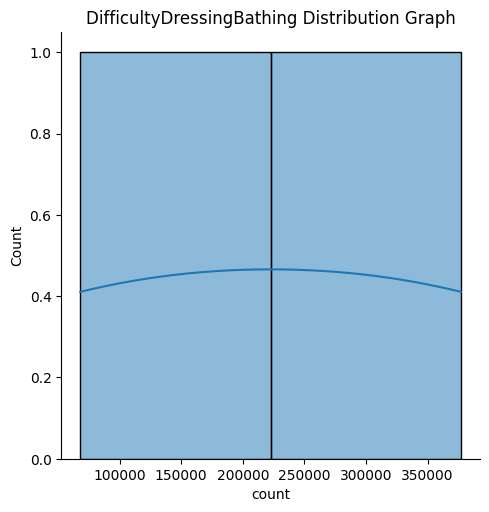

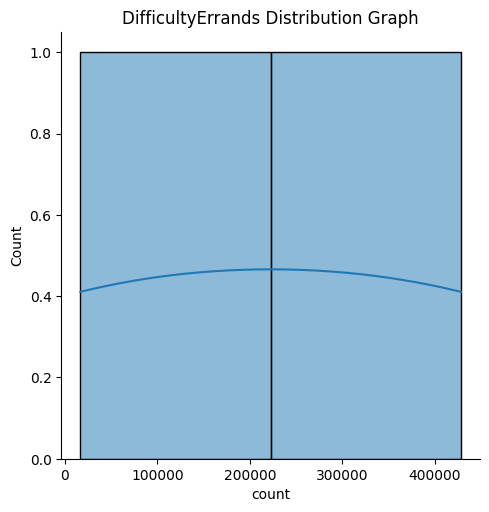

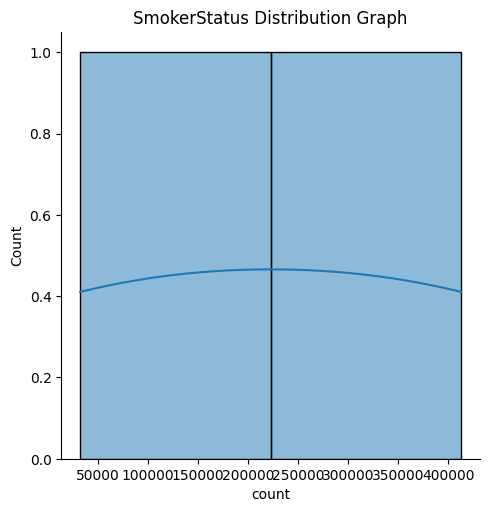

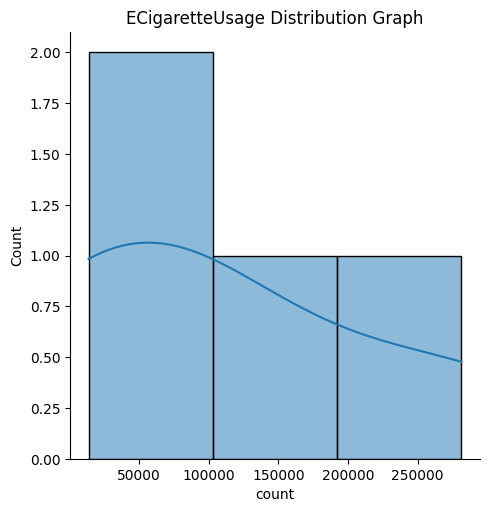

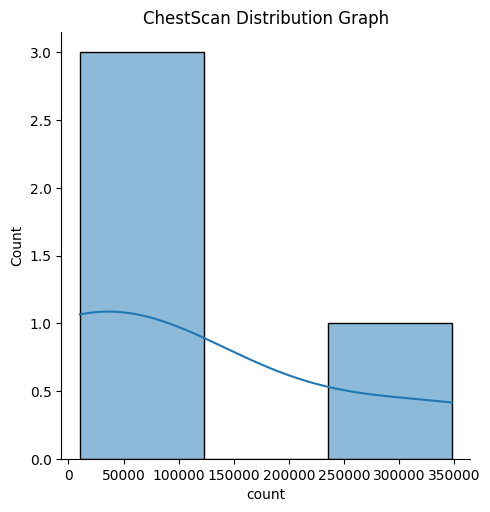

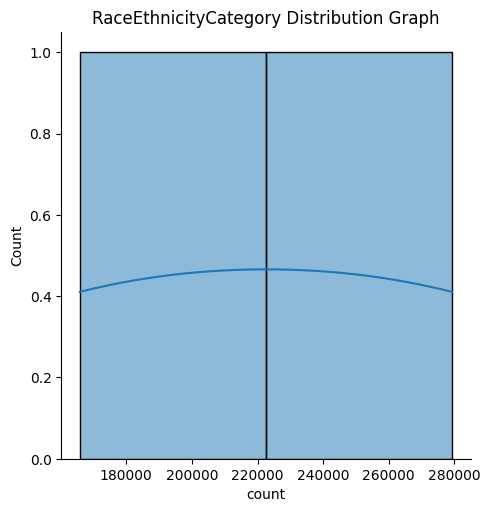

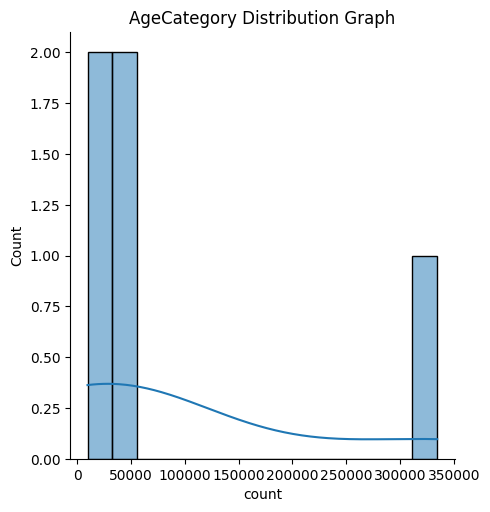

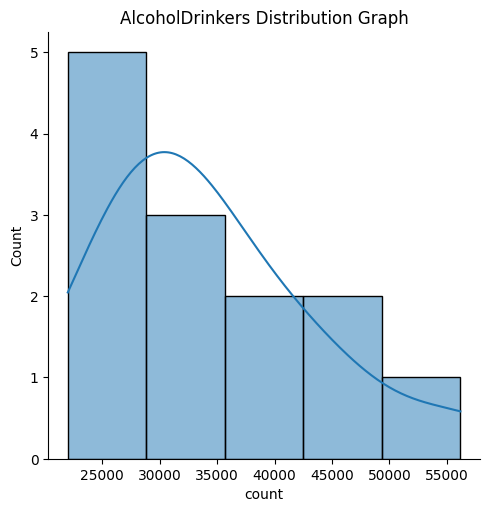

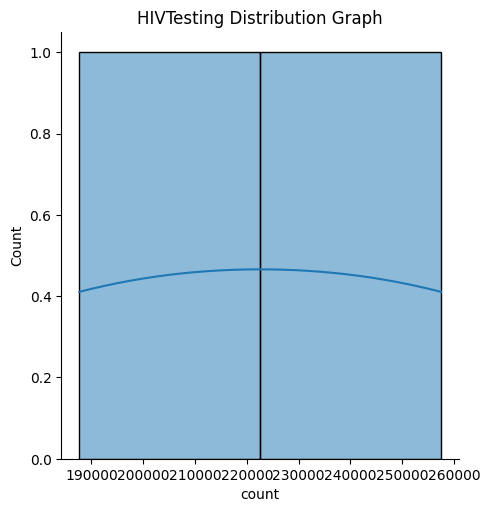

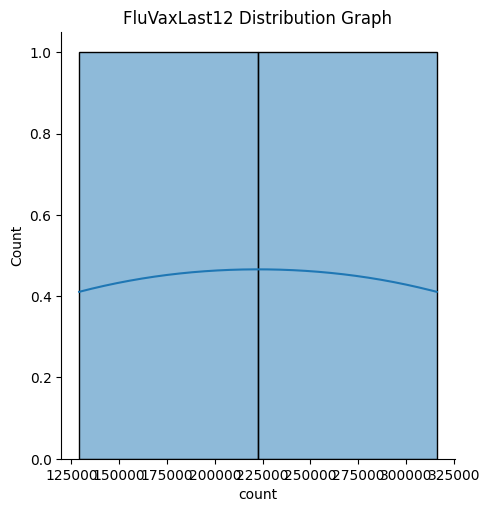

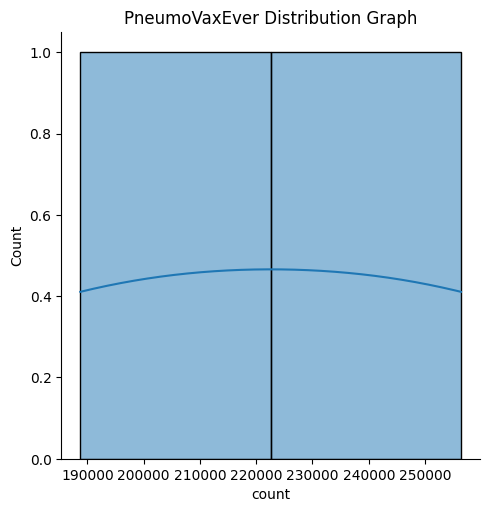

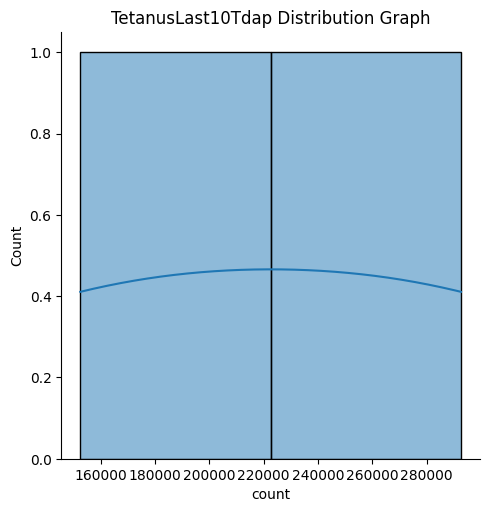

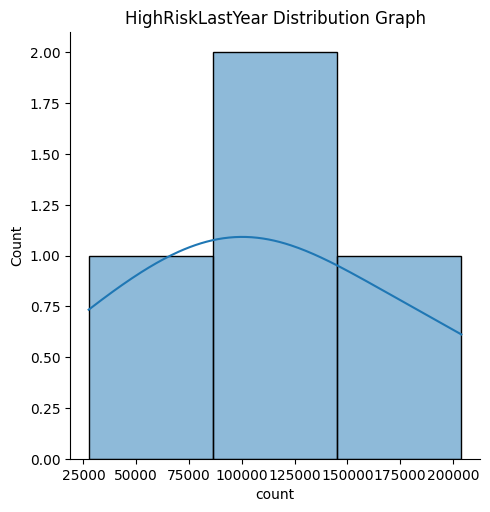

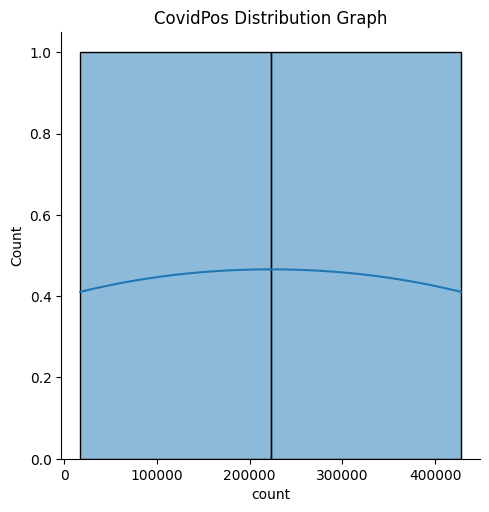

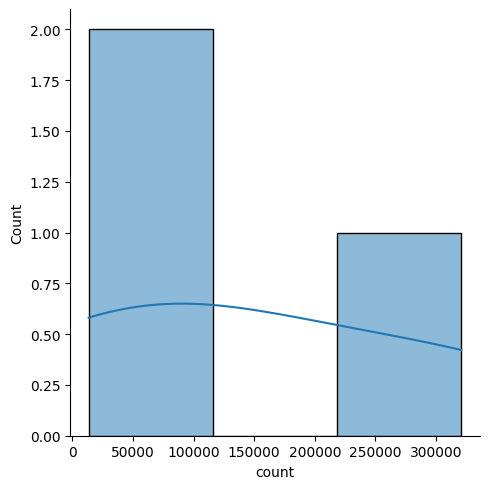

In [29]:
# HadHeartAttack target column
# for object types
for column in df.select_dtypes("object"):
  # plotting
  val_count = df[column].value_counts()

  plt.title(f"{column} Distribution Graph")

  sns.displot(data=val_count, kde=True)

In [51]:
label_encoder = LabelEncoder()
target = df.pop("HadHeartAttack")
df2 = df

In [52]:
for i in df2.select_dtypes(object):
  df2[i] = label_encoder.fit_transform(df2[i])

In [53]:
target = pd.get_dummies(target, drop_first=True, dtype=int
                        )

In [65]:
target.columns = ["Heart_attack"]

In [73]:
merged = pd.concat([target, df2], axis=1)

In [74]:
merged

,Heart_attack,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,0,4,0.0,0.0,3,0,8.0,3,...,1.70,80.74,27.44,0,0,1,0,2,0,0
1,0,0,0,0,0.0,0.0,3,0,6.0,3,...,1.60,68.04,26.57,0,0,0,0,0,0,0
2,0,0,0,4,2.0,3.0,3,1,5.0,3,...,1.57,63.50,25.61,0,0,0,0,0,0,2
3,0,0,0,0,0.0,0.0,3,1,7.0,3,...,1.65,63.50,23.30,0,0,1,1,0,0,0
4,0,0,0,1,2.0,0.0,3,1,9.0,3,...,1.57,53.98,21.77,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0,48,0,2,0.0,3.0,1,1,6.0,3,...,1.65,69.85,25.63,1,1,0,0,0,0,2
445128,0,48,0,0,2.0,2.0,3,1,7.0,3,...,1.70,83.01,28.66,0,1,1,0,2,0,0
445129,0,48,0,3,30.0,30.0,0,0,5.0,0,...,1.70,49.90,17.23,1,0,0,0,0,0,0
445130,1,48,1,4,0.0,0.0,3,0,5.0,3,...,1.83,108.86,32.55,0,1,1,1,0,0,2


In [76]:
corr = merged.corr()["Heart_attack"]
corr.sort_values(ascending=False)

Heart_attack                 1.000000
HadAngina                    0.428037
HadStroke                    0.184398
AgeCategory                  0.175519
DifficultyWalking            0.159804
ChestScan                    0.153633
HadCOPD                      0.140901
PhysicalHealthDays           0.136141
HadDiabetes                  0.135948
HadArthritis                 0.123385
HadKidneyDisease             0.114460
PneumoVaxEver                0.111353
DeafOrHardOfHearing          0.100536
DifficultyErrands            0.091766
DifficultyDressingBathing    0.085743
BlindOrVisionDifficulty      0.076466
Sex                          0.070525
LastCheckupTime              0.062462
DifficultyConcentrating      0.052258
HadSkinCancer                0.052218
FluVaxLast12                 0.041534
WeightInKilograms            0.036457
BMI                          0.029813
HadDepressiveDisorder        0.029359
MentalHealthDays             0.027892
RaceEthnicityCategory        0.027878
HadAsthma   

In [78]:
# create train and tes
y = target
X = df2

In [79]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [80]:
X_train.shape, y_train.shape

((311592, 39), (311592, 1))

In [82]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
def evaluate_model(model):
  predicted = model.predict(X_test)
  true = y_test

  print("F1: ", f1_score(y_test, predicted), "\n")
  print("acc: ", accuracy_score(y_test, predicted), "\n")
  print("confusion_matrix: ", confusion_matrix(y_test, predicted), "\n")

In [83]:
# logistic reg
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
evaluate_model(logistic_reg)

F1:  0.284421336414404 

acc:  0.9443462632918975 

confusion_matrix:  [[124631   1305]
 [  6127   1477]] 



In [86]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [88]:
rf = RandomForestClassifier(max_depth=10, n_jobs=4)
rf.fit(X_train, y_train)

<ipython-input-88-97b44a6ff900>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_jobs=4)

In [89]:
evaluate_model(model=rf)

F1:  0.14284038935147178 

acc:  0.9452673356297738 

confusion_matrix:  [[125622    314]
 [  6995    609]] 

